# 18. Portfolio Valuation
From Python for Finance

In [1]:
import sys
sys.path.append(".//Valuations//")
from Valuations import *

import datetime as dt

In [2]:
me_gbm = market_environment('me_gbm', dt.datetime(2015, 1, 1))
me_gbm.add_constant('initial_value', 36.)
me_gbm.add_constant('volatility', 0.2)
# me_gbm.add_constant('final_date', dt.datetime(2016, 12, 31))
me_gbm.add_constant('currency', 'EUR')
me_gbm.add_constant('frequency', 'W') # weekly frequency
me_gbm.add_constant('paths', 50000)
me_gbm.add_constant('model','gbm')

In [3]:
from derivatives_position import derivatives_position

In [4]:
me_am_put = market_environment('me_am_put', dt.datetime(2015,1,1))
me_am_put.add_constant('maturity', dt.datetime(2015,12,31))
me_am_put.add_constant('strike', 40.)
me_am_put.add_constant('currency','EUR')

In [5]:
payoff_func = 'np.maximum(strike - instrument_values, 0)'

In [6]:
am_put_pos = derivatives_position(name='am_put_pos',
                                 quantity=3,
                                 underlying='gbm',
                                 mar_env=me_am_put,
                                 otype='American',
                                 payoff_func=payoff_func)

In [7]:
am_put_pos.get_info()

Name: am_put_pos
Quantity: 3
Underlying: gbm
Market Environment:

**Constants**
maturity: 2015-12-31 00:00:00
strike: 40.0
currency: EUR

**Lists**

**Curves**
Option Type: American
Payoff Function: np.maximum(strike - instrument_values, 0)


## Portfolio Use Case

In [8]:
me_jd = market_environment('me_jd', me_gbm.pricing_date)

In [9]:
#discounting object for the valuation
csr = constant_short_rate('csr', 0.06)

In [10]:
#add jump diffusion-specific parameters
me_jd.add_constant('lambda', 0.3)
me_jd.add_constant('mu', -0.75)
me_jd.add_constant('delta', 0.1)
me_jd.add_environment(me_gbm)
me_jd.add_constant('model', 'jd')
me_jd.add_curve('discount_curve', csr)

Add a European call based on this simulation object

In [11]:
me_eur_call = market_environment('me_eur_call', me_jd.pricing_date)

In [12]:
me_eur_call.add_constant('maturity', dt.datetime(2015, 6, 30))
me_eur_call.add_constant('strike', 38.)
me_eur_call.add_constant('currency', 'EUR')

In [13]:
payoff_func = 'np.maximum(maturity_value - strike, 0)'

In [14]:
eur_call_pos = derivatives_position(name='eur_call_pos',
                                   quantity=5, 
                                   underlying='jd',
                                   mar_env=me_eur_call,
                                   otype='European',
                                   payoff_func=payoff_func)

In [15]:
underlyings = {'gbm': me_gbm, 'jd': me_jd}
positions ={'am_put_pos': am_put_pos, 'eur_call_pos': eur_call_pos}

In [16]:
val_env = market_environment('general', me_gbm.pricing_date)
val_env.add_constant('frequency', 'W')
#monthly frequency
val_env.add_constant('paths', 25000)
val_env.add_constant('starting_date', val_env.pricing_date)
val_env.add_constant('final_date', val_env.pricing_date)
val_env.add_curve('discount_curve', csr)

In [17]:
from derivatives_portfolio import derivatives_portfolio

In [18]:
portfolio = derivatives_portfolio(name='portfolio',
                                 positions=positions,
                                 val_env=val_env,
                                 assets=underlyings, 
                                 fixed_seed=True)

In [19]:
portfolio.get_statistics()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.307780,EUR,12.923340,-2.0382,25.7007
1,eur_call_pos,5,3.129377,EUR,15.646885,3.4610,54.0450


In [20]:
portfolio.get_statistics()[['pos_value', 'pos_delta','pos_vega']].sum()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


pos_value    28.635208
pos_delta     1.332500
pos_vega     79.745700
dtype: float64

In [21]:
# portfolio.get_positions()

In [22]:
portfolio.valuation_objects['am_put_pos'].present_value()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


4.3294410000000001

In [23]:
portfolio.valuation_objects['eur_call_pos'].delta()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


0.6966

In [24]:
path_no = 777
path_gbm = portfolio.underlying_objects['gbm'].get_instrument_values()[:,path_no]
path_jd = portfolio.underlying_objects['jd'].get_instrument_values()[:,path_no]

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


In [25]:
len(path_jd)
# len(portfolio.time_grid)

55

In [26]:
path_gbm[:54]

array([ 36.        ,  36.6472399 ,  37.30120936,  37.89171578,
        38.62002781,  37.55952733,  38.32647074,  36.56100782,
        36.1191368 ,  35.63653655,  36.10547049,  36.44299715,
        34.29451949,  34.16786785,  35.21898735,  35.2009067 ,
        35.87377682,  35.72108271,  34.09846095,  34.73253501,
        35.41700983,  36.93772611,  36.21148071,  36.82766347,
        36.16568236,  37.09373559,  38.30577478,  38.96055035,
        39.91478292,  37.35269231,  38.36361815,  39.61530462,
        37.93326504,  37.86980579,  35.85363052,  35.70271643,
        35.56570205,  35.1080441 ,  35.55135554,  35.49068341,
        35.86051727,  36.19828598,  37.20752907,  37.41460989,
        37.5092042 ,  38.66793306,  38.6292196 ,  38.84845621,
        38.43094613,  37.8098343 ,  38.41960714,  37.60801897,
        37.18433868,  36.55527007])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

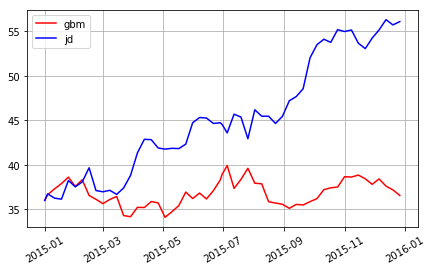

In [28]:
plt.figure(figsize=(7,4))
plt.plot(portfolio.time_grid[:54], path_gbm[:54],'r',label='gbm')
plt.plot(portfolio.time_grid[:54], path_jd[:54],'b',label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0); plt.grid(True)

## Correlated

In [29]:
correlations = [['gbm', 'jd', 0.9]]

In [30]:
port_corr = derivatives_portfolio(name='portfolio',
                                 positions=positions, 
                                 val_env=val_env,
                                 assets=underlyings,
                                 correlations=correlations,
                                 fixed_seed=True)

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


In [31]:
port_corr.get_statistics()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


,name,quant.,value,curr.,pos_value,pos_delta,pos_vega
0,am_put_pos,3,4.325536,EUR,12.976608,-2.1108,25.4409
1,eur_call_pos,5,3.099159,EUR,15.495795,3.6165,53.7795


In [32]:
path_gbm = port_corr.underlying_objects['gbm'].get_instrument_values()[:,path_no]
path_jd = port_corr.underlying_objects['jd'].get_instrument_values()[:,path_no]

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


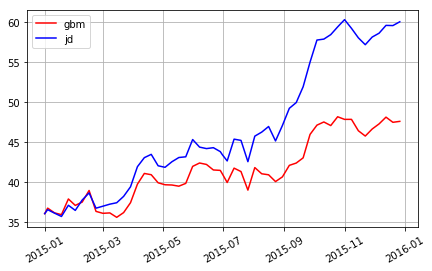

In [33]:
plt.figure(figsize=(7,4))
plt.plot(portfolio.time_grid[:54], path_gbm[:54],'r',label='gbm')
plt.plot(portfolio.time_grid[:54], path_jd[:54],'b',label='jd')
plt.xticks(rotation=30)
plt.legend(loc=0); plt.grid(True)

### *Frequency distribution of the portfolio present value*

In [34]:
pv1 = 5 * port_corr.valuation_objects['eur_call_pos'].present_value(full=True)[1]
pv1

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


array([  0.        ,  42.52248965,  26.45713042, ...,   0.46261546,
         8.264662  ,   9.95561037])

In [35]:
pv2 = 3 * port_corr.valuation_objects['am_put_pos'].present_value(full=True)[1]
pv2

array([ 16.73787947,   9.98136021,  20.24840709, ...,  21.51549915,
        17.26377034,   0.        ])

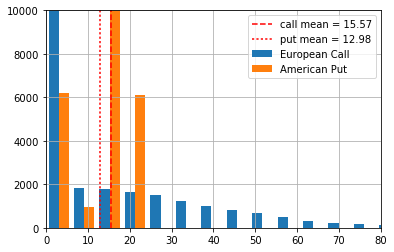

In [45]:
plt.hist([pv1,pv2], bins=25, label=['European Call','American Put'])
plt.axvline(pv1.mean(), color='r',ls='dashed',lw=1.5, label='call mean = {:4.2f}'.format(pv1.mean()))
plt.axvline(pv2.mean(), color='r',ls='dotted',lw=1.5, label='put mean = {:4.2f}'.format(pv2.mean()))
plt.xlim(0,80)
plt.ylim(0,10000)
plt.grid()
plt.legend()

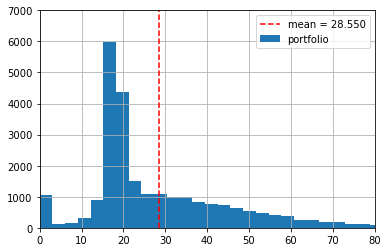

In [47]:
pvs = pv1 + pv2
plt.hist(pvs, bins=50, label='portfolio')
plt.axvline(pvs.mean(), color='r', ls='dashed',lw=1.5, label='mean = {:4.3f}'.format(pvs.mean()))
plt.xlim(0,80)
plt.ylim(0,7000)
plt.grid();plt.legend()

In [48]:
pvs.std()

18.292574905390854

### Portfolio without correlation

In [53]:
pv1 = 5 * portfolio.valuation_objects['eur_call_pos'].present_value(full=True)[1]
pv2 = 3 * portfolio.valuation_objects['am_put_pos'].present_value(full=True)[1]
(pv1+pv2).std()

.//Valuations\functions.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  ran = np.random.standard_normal((shape[0], shape[1], shape[2] / 2))


22.847041568689392